In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math
from math import sqrt

from sympy.solvers import solve
from sympy import symbols, diff
import sympy

In [6]:
width = 100
x_min = (272 - width) / 2.0
y_min =  -30

def get_alphas(x,y):
    # assumed physical parameters
    R1 = 115  # left arm length
    R2 = 115
    l1 = 160  # left wire length
    l2 = 160
    D = 272  # distance of motor axles
    
    x = x
    y = y
    ca1 = (x * (R1 ** 2 - l1 ** 2 + x ** 2 + y ** 2) + y * math.sqrt(
        (-R1 ** 2 + 2 * R1 * l1 - l1 ** 2 + x ** 2 + y ** 2) * (
                R1 ** 2 + 2 * R1 * l1 + l1 ** 2 - x ** 2 - y ** 2))) / (2 * R1 * (x ** 2 + y ** 2))
    sa1 = math.sqrt(1 - ca1 ** 2)

    ca2 = (y * math.sqrt((-D ** 2 + 2 * D * x + R2 ** 2 + 2 * R2 * l2 + l2 ** 2 - x ** 2 - y ** 2) * (
            D ** 2 - 2 * D * x - R2 ** 2 + 2 * R2 * l2 - l2 ** 2 + x ** 2 + y ** 2)) + (D - x) * (
                   D ** 2 - 2 * D * x + R2 ** 2 - l2 ** 2 + x ** 2 + y ** 2)) / (
                  2 * R2 * (D ** 2 - 2 * D * x + x ** 2 + y ** 2))
    sa2 = math.sqrt(1 - ca2 ** 2)

    alpha1 = math.atan2(sa1, ca1)# / math.pi * 180
    alpha2 = math.atan2(sa2, ca2)# / math.pi * 180  # by our convention positive is up (as opposed to math)
    
    return alpha1, alpha2

def get_xy(alpha1, alpha2):
    #actual physical parameters
    R1 = 115  # left arm length
    R2 = 115
    l1 = 155  # left wire length
    l2 = 160
    D = 272  # distance of motor axles
    
    #print(alpha1, alpha2)
    ca1 = math.cos(alpha1)
    #print(ca1)
    sa1 = math.sin(alpha1)
    ca2 = math.cos(alpha2)
    sa2 = math.sin(alpha2)
    #print(ca1, sa1, ca2, sa2)
    x = (-D**2/2 + D*R2*ca2 + R1**2/2 - R2**2/2 - l1**2/2 + l2**2/2 + (R1*sqrt(1 - ca1**2) - R2*sqrt(1 - ca2**2))*(sqrt(-(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)*(D**4 - 4*D**3*R1*ca1 - 4*D**3*R2*ca2 + 4*D**2*R1**2*ca1**2 + 2*D**2*R1**2 + 12*D**2*R1*R2*ca1*ca2 + 4*D**2*R2**2*ca2**2 + 2*D**2*R2**2 - 2*D**2*l1**2 - 2*D**2*l2**2 - 4*D*R1**3*ca1 - 8*D*R1**2*R2*ca1**2*ca2 - 4*D*R1**2*R2*ca2 - 8*D*R1*R2**2*ca1*ca2**2 - 4*D*R1*R2**2*ca1 + 4*D*R1*ca1*l1**2 + 4*D*R1*ca1*l2**2 - 4*D*R2**3*ca2 + 4*D*R2*ca2*l1**2 + 4*D*R2*ca2*l2**2 + R1**4 + 4*R1**3*R2*ca1*ca2 + 4*R1**2*R2**2*ca1**2 + 4*R1**2*R2**2*ca2**2 - 2*R1**2*R2**2 - 4*R1**2*ca1**2*l2**2 - 2*R1**2*l1**2 + 2*R1**2*l2**2 + 4*R1*R2**3*ca1*ca2 - 4*R1*R2*ca1*ca2*l1**2 - 4*R1*R2*ca1*ca2*l2**2 + R2**4 - 4*R2**2*ca2**2*l1**2 + 2*R2**2*l1**2 - 2*R2**2*l2**2 + l1**4 - 2*l1**2*l2**2 + l2**4) + (D**2*R1*sqrt(1 - ca1**2) + D**2*R2*sqrt(1 - ca2**2) - 2*D*R1**2*ca1*sqrt(1 - ca1**2) - 2*D*R1*R2*ca1*sqrt(1 - ca2**2) - 2*D*R1*R2*ca2*sqrt(1 - ca1**2) - 2*D*R2**2*ca2*sqrt(1 - ca2**2) + R1**3*sqrt(1 - ca1**2) + 2*R1**2*R2*ca1**2*sqrt(1 - ca2**2) + 2*R1**2*R2*ca1*ca2*sqrt(1 - ca1**2) - R1**2*R2*sqrt(1 - ca2**2) + 2*R1*R2**2*ca1*ca2*sqrt(1 - ca2**2) + 2*R1*R2**2*ca2**2*sqrt(1 - ca1**2) - R1*R2**2*sqrt(1 - ca1**2) - R1*l1**2*sqrt(1 - ca1**2) + R1*l2**2*sqrt(1 - ca1**2) + R2**3*sqrt(1 - ca2**2) + R2*l1**2*sqrt(1 - ca2**2) - R2*l2**2*sqrt(1 - ca2**2))**2)/(2*(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)) + (-D**2*R1*sqrt(1 - ca1**2)/2 - D**2*R2*sqrt(1 - ca2**2)/2 + D*R1**2*ca1*sqrt(1 - ca1**2) + D*R1*R2*ca1*sqrt(1 - ca2**2) + D*R1*R2*ca2*sqrt(1 - ca1**2) + D*R2**2*ca2*sqrt(1 - ca2**2) - R1**3*sqrt(1 - ca1**2)/2 - R1**2*R2*ca1**2*sqrt(1 - ca2**2) - R1**2*R2*ca1*ca2*sqrt(1 - ca1**2) + R1**2*R2*sqrt(1 - ca2**2)/2 - R1*R2**2*ca1*ca2*sqrt(1 - ca2**2) - R1*R2**2*ca2**2*sqrt(1 - ca1**2) + R1*R2**2*sqrt(1 - ca1**2)/2 + R1*l1**2*sqrt(1 - ca1**2)/2 - R1*l2**2*sqrt(1 - ca1**2)/2 - R2**3*sqrt(1 - ca2**2)/2 - R2*l1**2*sqrt(1 - ca2**2)/2 + R2*l2**2*sqrt(1 - ca2**2)/2)/(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)))/(-D + R1*ca1 + R2*ca2)
    y = sqrt(-(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)*(D**4 - 4*D**3*R1*ca1 - 4*D**3*R2*ca2 + 4*D**2*R1**2*ca1**2 + 2*D**2*R1**2 + 12*D**2*R1*R2*ca1*ca2 + 4*D**2*R2**2*ca2**2 + 2*D**2*R2**2 - 2*D**2*l1**2 - 2*D**2*l2**2 - 4*D*R1**3*ca1 - 8*D*R1**2*R2*ca1**2*ca2 - 4*D*R1**2*R2*ca2 - 8*D*R1*R2**2*ca1*ca2**2 - 4*D*R1*R2**2*ca1 + 4*D*R1*ca1*l1**2 + 4*D*R1*ca1*l2**2 - 4*D*R2**3*ca2 + 4*D*R2*ca2*l1**2 + 4*D*R2*ca2*l2**2 + R1**4 + 4*R1**3*R2*ca1*ca2 + 4*R1**2*R2**2*ca1**2 + 4*R1**2*R2**2*ca2**2 - 2*R1**2*R2**2 - 4*R1**2*ca1**2*l2**2 - 2*R1**2*l1**2 + 2*R1**2*l2**2 + 4*R1*R2**3*ca1*ca2 - 4*R1*R2*ca1*ca2*l1**2 - 4*R1*R2*ca1*ca2*l2**2 + R2**4 - 4*R2**2*ca2**2*l1**2 + 2*R2**2*l1**2 - 2*R2**2*l2**2 + l1**4 - 2*l1**2*l2**2 + l2**4) + (D**2*R1*sqrt(1 - ca1**2) + D**2*R2*sqrt(1 - ca2**2) - 2*D*R1**2*ca1*sqrt(1 - ca1**2) - 2*D*R1*R2*ca1*sqrt(1 - ca2**2) - 2*D*R1*R2*ca2*sqrt(1 - ca1**2) - 2*D*R2**2*ca2*sqrt(1 - ca2**2) + R1**3*sqrt(1 - ca1**2) + 2*R1**2*R2*ca1**2*sqrt(1 - ca2**2) + 2*R1**2*R2*ca1*ca2*sqrt(1 - ca1**2) - R1**2*R2*sqrt(1 - ca2**2) + 2*R1*R2**2*ca1*ca2*sqrt(1 - ca2**2) + 2*R1*R2**2*ca2**2*sqrt(1 - ca1**2) - R1*R2**2*sqrt(1 - ca1**2) - R1*l1**2*sqrt(1 - ca1**2) + R1*l2**2*sqrt(1 - ca1**2) + R2**3*sqrt(1 - ca2**2) + R2*l1**2*sqrt(1 - ca2**2) - R2*l2**2*sqrt(1 - ca2**2))**2)/(2*(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)) + (-D**2*R1*sqrt(1 - ca1**2)/2 - D**2*R2*sqrt(1 - ca2**2)/2 + D*R1**2*ca1*sqrt(1 - ca1**2) + D*R1*R2*ca1*sqrt(1 - ca2**2) + D*R1*R2*ca2*sqrt(1 - ca1**2) + D*R2**2*ca2*sqrt(1 - ca2**2) - R1**3*sqrt(1 - ca1**2)/2 - R1**2*R2*ca1**2*sqrt(1 - ca2**2) - R1**2*R2*ca1*ca2*sqrt(1 - ca1**2) + R1**2*R2*sqrt(1 - ca2**2)/2 - R1*R2**2*ca1*ca2*sqrt(1 - ca2**2) - R1*R2**2*ca2**2*sqrt(1 - ca1**2) + R1*R2**2*sqrt(1 - ca1**2)/2 + R1*l1**2*sqrt(1 - ca1**2)/2 - R1*l2**2*sqrt(1 - ca1**2)/2 - R2**3*sqrt(1 - ca2**2)/2 - R2*l1**2*sqrt(1 - ca2**2)/2 + R2*l2**2*sqrt(1 - ca2**2)/2)/(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)
    return x,y

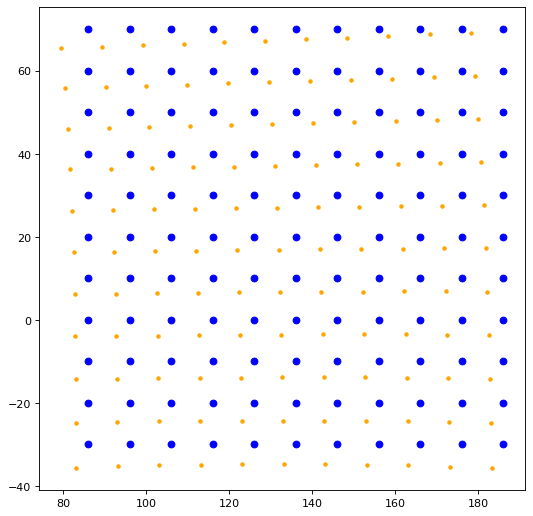

In [7]:
ticks_dist_mm = 10.0
resolution = np.arange(0, width + 1, ticks_dist_mm)
grid_xs = np.array([x_min + elem for i in range(len(resolution)) for elem in resolution ])
grid_ys = np.array([y_min + elem for elem in resolution for i in range(len(resolution))])

plt.figure(figsize=(8,8 ), dpi=80)
plt.gca().set_aspect('equal')
plt.scatter(grid_xs, grid_ys, color="blue", marker="o")
plt.scatter(*list(zip(*map(lambda x: get_xy(*x),map(lambda pair: get_alphas(*pair), zip(grid_xs, grid_ys))))), color="orange", marker=".")

[((0.0, 0.0), (10.0, 0.0)),
 ((10.0, 0.0), (20.0, 0.0)),
 ((20.0, 0.0), (30.0, 0.0)),
 ((30.0, 0.0), (40.0, 0.0)),
 ((40.0, 0.0), (50.0, 0.0)),
 ((50.0, 0.0), (60.0, 0.0)),
 ((60.0, 0.0), (70.0, 0.0)),
 ((70.0, 0.0), (80.0, 0.0)),
 ((80.0, 0.0), (90.0, 0.0)),
 ((90.0, 0.0), (100.0, 0.0)),
 ((0.0, 10.0), (10.0, 10.0)),
 ((10.0, 10.0), (20.0, 10.0)),
 ((20.0, 10.0), (30.0, 10.0)),
 ((30.0, 10.0), (40.0, 10.0)),
 ((40.0, 10.0), (50.0, 10.0)),
 ((50.0, 10.0), (60.0, 10.0)),
 ((60.0, 10.0), (70.0, 10.0)),
 ((70.0, 10.0), (80.0, 10.0)),
 ((80.0, 10.0), (90.0, 10.0)),
 ((90.0, 10.0), (100.0, 10.0)),
 ((0.0, 20.0), (10.0, 20.0)),
 ((10.0, 20.0), (20.0, 20.0)),
 ((20.0, 20.0), (30.0, 20.0)),
 ((30.0, 20.0), (40.0, 20.0)),
 ((40.0, 20.0), (50.0, 20.0)),
 ((50.0, 20.0), (60.0, 20.0)),
 ((60.0, 20.0), (70.0, 20.0)),
 ((70.0, 20.0), (80.0, 20.0)),
 ((80.0, 20.0), (90.0, 20.0)),
 ((90.0, 20.0), (100.0, 20.0)),
 ((0.0, 30.0), (10.0, 30.0)),
 ((10.0, 30.0), (20.0, 30.0)),
 ((20.0, 30.0), (30.0, 30.0))

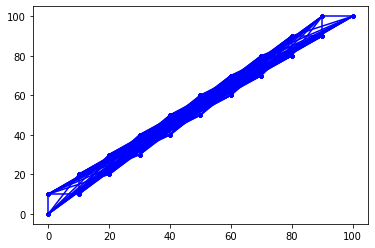

In [3]:
ticks_dist_mm = 10.0
ticks = np.arange(0, width + 1, ticks_dist_mm)
resolution = len(ticks)
#verticals = [((x, x), (y1, y2))  for x in resolution for y1, y2 in zip(resolution, resolution[1:])]
grid = [[(ticks[i], ticks[j]) for i in range(resolution)] for j in range(resolution)]

def plot_grid(grid):
    verticals = [((ticks[i], ticks[i]), (ticks[j1], ticks[j2]))  
                 for i in range(len(ticks)) 
                 for j1, j2 in zip(range(len(ticks)),range(1, len(ticks)))]
    horizontals = [((ticks[j1], ticks[j2]), (ticks[i], ticks[i]))  
                 for i in range(len(ticks)) 
                 for j1, j2 in zip(range(len(ticks)),range(1, len(ticks)))]
    verticals = [(grid[i][j], grid[i][j+1])  
                 for i in range(resolution) 
                 for j in range(resolution - 1)]
    for line in verticals:
        plt.plot(*line, "b.-")
    for line in horizontals:
        pass
        #plt.plot(*line, "b-")
    
plot_grid(grid)
[(grid[i][j], grid[i][j+1])  
                 for i in range(resolution) 
                 for j in range(resolution - 1)]
#plt.scatter(*zip(*(grid[i][j][0], grid[i][j][1] for grid)

In [79]:
x,y,R1,ca1,sa1,R2,ca2,sa2,D,l1,l2=symbols("x,y,R1,ca1,sa1,R2,ca2,sa2,D,l1,l2")
solve([(x-R1*ca1)**2 + (y + R1*sympy.sqrt(1-ca1**2))**2 - l1**2,
       (D-x-R2*ca2)**2 + (y + R2*sympy.sqrt(1-ca2**2))**2 - l2**2],x,y, dict = True)

[{x: (-D**2/2 + D*R2*ca2 + R1**2/2 - R2**2/2 - l1**2/2 + l2**2/2 + (R1*sqrt(1 - ca1**2) - R2*sqrt(1 - ca2**2))*(-sqrt(-(D**2 - 2*D*R1*ca1 - 2*D*R2*ca2 + R1**2 + 2*R1*R2*ca1*ca2 - 2*R1*R2*sqrt(1 - ca1**2)*sqrt(1 - ca2**2) + R2**2)*(D**4 - 4*D**3*R1*ca1 - 4*D**3*R2*ca2 + 4*D**2*R1**2*ca1**2 + 2*D**2*R1**2 + 12*D**2*R1*R2*ca1*ca2 + 4*D**2*R2**2*ca2**2 + 2*D**2*R2**2 - 2*D**2*l1**2 - 2*D**2*l2**2 - 4*D*R1**3*ca1 - 8*D*R1**2*R2*ca1**2*ca2 - 4*D*R1**2*R2*ca2 - 8*D*R1*R2**2*ca1*ca2**2 - 4*D*R1*R2**2*ca1 + 4*D*R1*ca1*l1**2 + 4*D*R1*ca1*l2**2 - 4*D*R2**3*ca2 + 4*D*R2*ca2*l1**2 + 4*D*R2*ca2*l2**2 + R1**4 + 4*R1**3*R2*ca1*ca2 + 4*R1**2*R2**2*ca1**2 + 4*R1**2*R2**2*ca2**2 - 2*R1**2*R2**2 - 4*R1**2*ca1**2*l2**2 - 2*R1**2*l1**2 + 2*R1**2*l2**2 + 4*R1*R2**3*ca1*ca2 - 4*R1*R2*ca1*ca2*l1**2 - 4*R1*R2*ca1*ca2*l2**2 + R2**4 - 4*R2**2*ca2**2*l1**2 + 2*R2**2*l1**2 - 2*R2**2*l2**2 + l1**4 - 2*l1**2*l2**2 + l2**4) + (D**2*R1*sqrt(1 - ca1**2) + D**2*R2*sqrt(1 - ca2**2) - 2*D*R1**2*ca1*sqrt(1 - ca1**2) - 2*D*R